In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


Summary Statistics:

        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN                  891     2   
top             NaN         NaN         NaN  Dooley, Mr. Patrick  male   
freq            NaN         NaN         NaN                    1   577   
mean     446.000000    0.383838    2.308642                  NaN   NaN   
std      257.353842    0.486592    0.836071                  NaN   NaN   
min        1.000000    0.000000    1.000000                  NaN   NaN   
25%      223.500000    0.000000    2.000000                  NaN   NaN   
50%      446.000000    0.000000    3.000000                  NaN   NaN   
75%      668.500000    1.000000    3.000000                  NaN   NaN   
max      891.000000    1.000000    3.000000                  NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare Cabin Embarked  
count   71

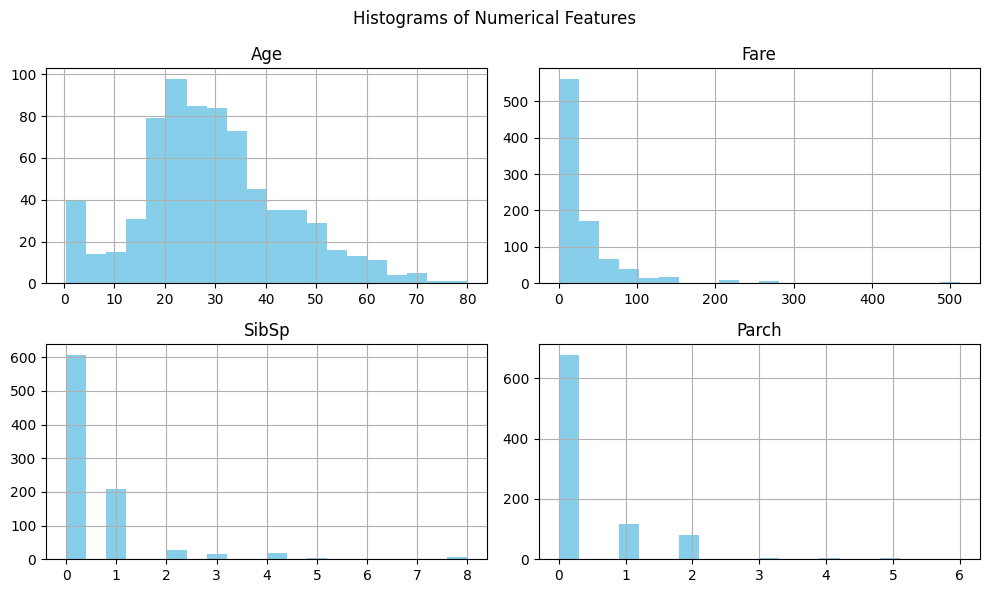

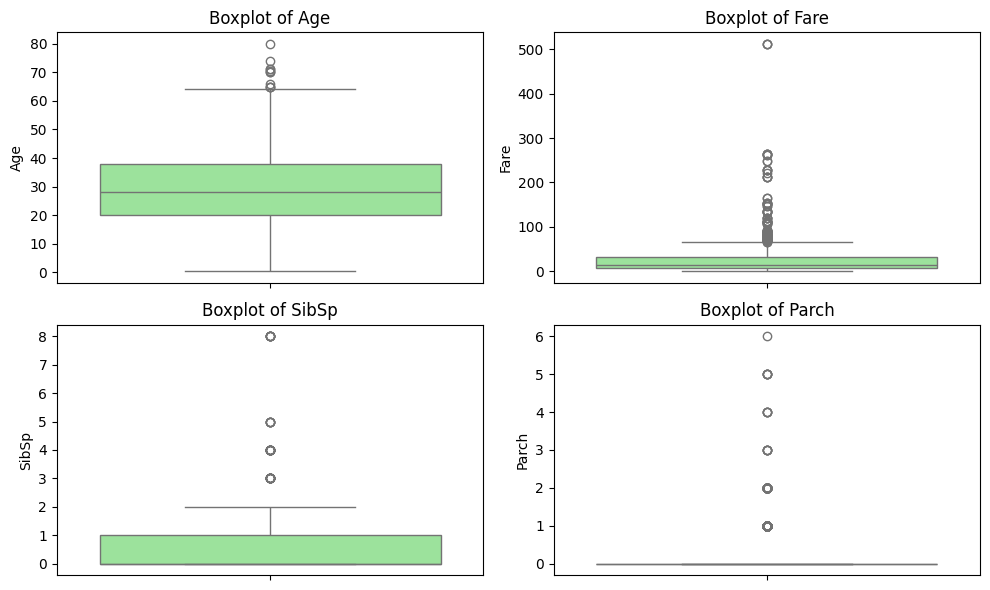

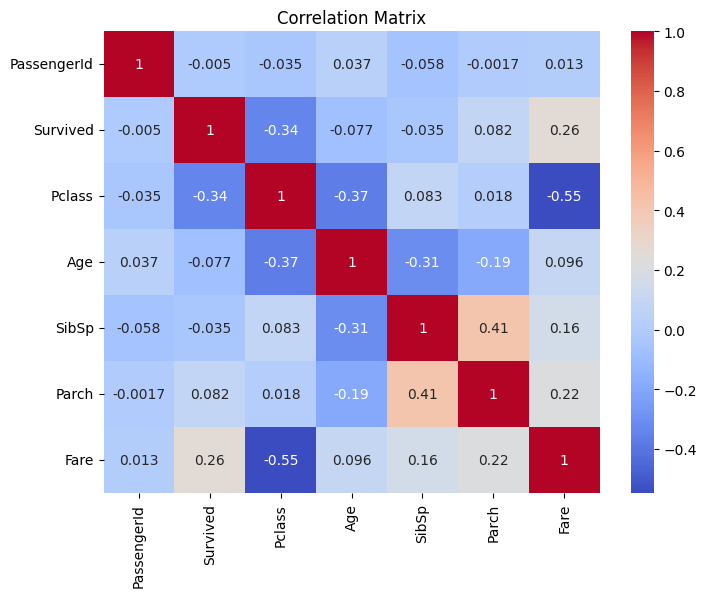

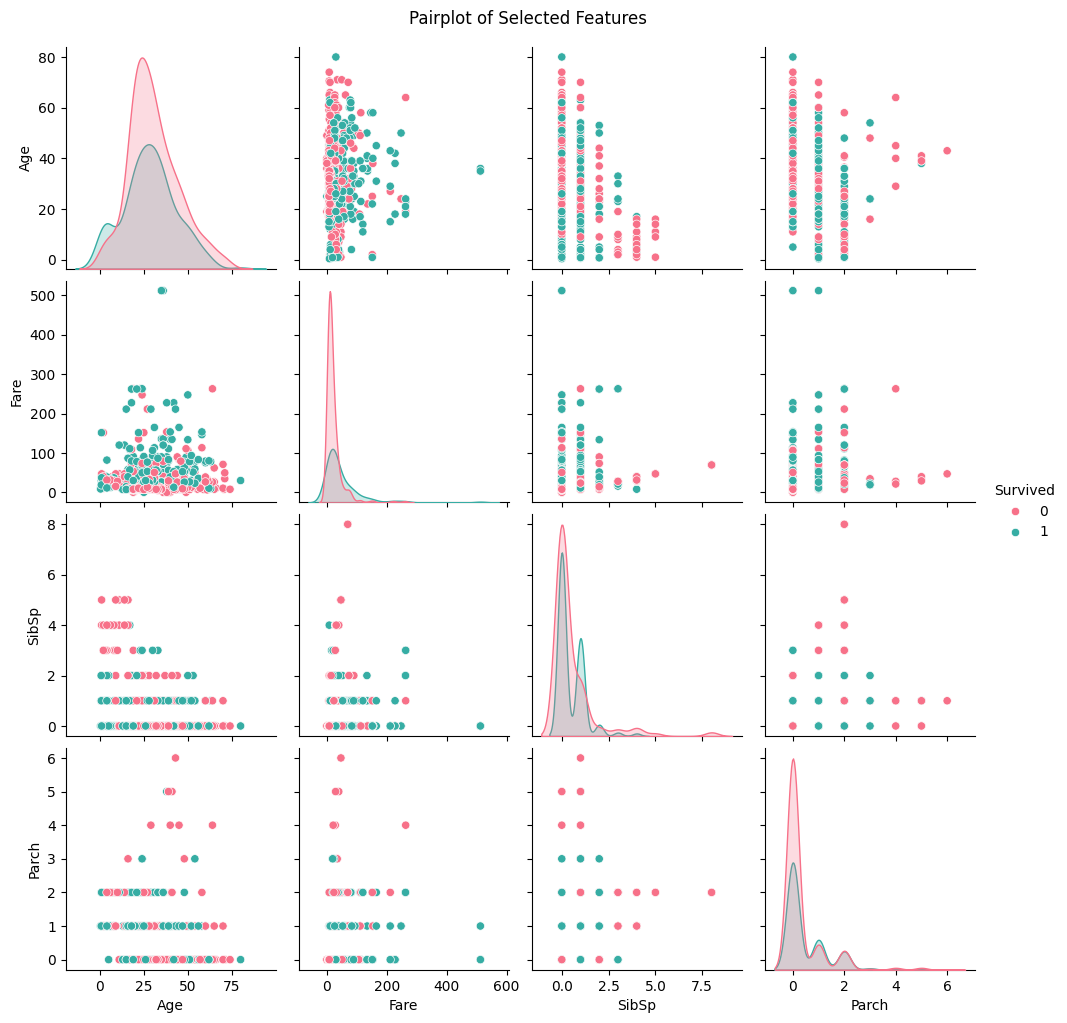


Basic Inferences:
- Average age of survivors vs non-survivors:
Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64
- Higher fare seems to increase survival chance.
- Outliers are visible in Fare and Age.


In [3]:
# Load Dataset
df = pd.read_csv("Titanic-Dataset.csv")

# Step 1: Summary Statistics
print("Summary Statistics:\n")
print(df.describe(include='all'))

# Step 2: Histograms for Numeric Features
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']
df[numeric_cols].hist(bins=20, figsize=(10, 6), color='skyblue')
plt.suptitle("Histograms of Numerical Features")
plt.tight_layout()
plt.show()

# Step 3: Boxplots for Numeric Features
plt.figure(figsize=(10, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=col, data=df, color='lightgreen')
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

# Step 4: Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Step 5: Pairplot
sns.pairplot(df[numeric_cols + ['Survived']], hue='Survived', palette='husl')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

# Step 6: Interactive Visualization with Plotly
fig = px.scatter(df, x='Age', y='Fare', color='Survived', title='Age vs Fare (Survival)')
fig.show()

# Step 7: Basic Inferences
print("\nBasic Inferences:")
print("- Average age of survivors vs non-survivors:")
print(df.groupby('Survived')['Age'].mean())
print("- Higher fare seems to increase survival chance.")
print("- Outliers are visible in Fare and Age.")
